# 

the probability mass of a region of parameter space, given a probability density function, is given by

$\oint_{V}{\text{pdf}(x) dV}$

where $dV = dr *\, r\, d\theta_1\, \dots r\, d\theta_{D-1}$

when there are $D$ dimensions.

for a multivariate normal, this is (proportional to):


$\iiint{e^{-\frac{1}{2}r^2} dr *\, r\, d\theta_1\, \dots r\, d\theta_{D-1}}$

$\iiint{e^{-\frac{1}{2}r^2} r^{D-1} dr *\, d\theta_1\, \dots d\theta_{D-1}}$

$\int{e^{-\frac{1}{2}r^2} r^{D-1} dr}$

Therefore, if we compressed the density on the r axis, the density $\frac{d\text{mass}}{dr}$ would be:

$\frac{r^{D-1}}{e^{\frac{1}{2}r^2}}$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-108-c76477001955>:9: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(r, 1/proba_density, label='1/probability density at r')
<ipython-input-108-c76477001955>:9: RuntimeWarning: overflow encountered in true_divide
  ax.plot(r, 1/proba_density, label='1/probability density at r')


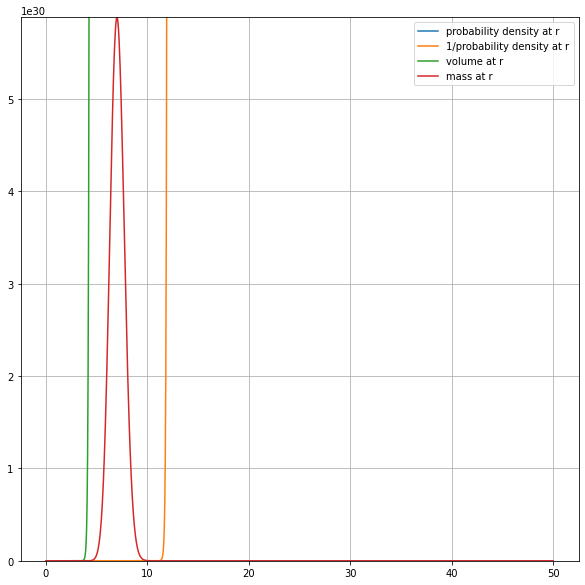

In [108]:
D = 50
r = np.linspace(0,50, 1000)
proba_density = np.exp(-0.5 * (r**2))
volume_density = r**(D-1)
mass = volume_density * proba_density

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(r, proba_density, label='probability density at r')
ax.plot(r, 1/proba_density, label='1/probability density at r')
ax.plot(r, volume_density, label='volume at r')
ax.plot(r, mass, label='mass at r')

ax.set_ylim(0, max(mass) + 1)
# ax.set_ylim(0, max(volume_density) + 1)
# ax.set_ylim(0, 100000)
ax.grid()

ax.legend()

In [109]:
r[np.argmax(mass)]

7.007007007007007

In [111]:
np.sqrt(50)

7.0710678118654755

let's try to sample from a multivariate normal and see how far we are from the center

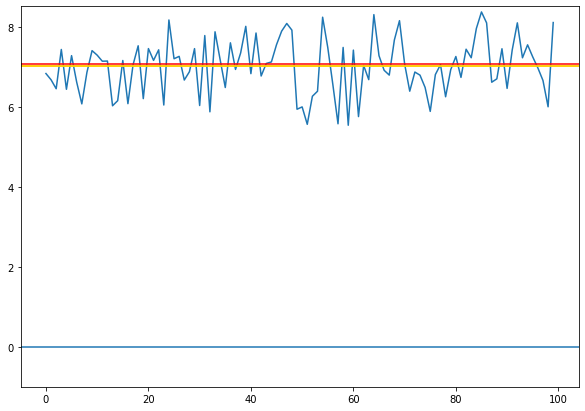

In [112]:
n = 100
# distance = np.sqrt(np.sum(np.random.normal(size=(D,n))**2, axis=0))
distance = np.random.multivariate_normal(np.zeros(D), np.eye(D), size = n)
distance = np.sum(distance**2, axis=1)
distance = np.sqrt(distance)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(range(n), distance)
ax.set_ylim(-1)
ax.axhline(0)
ax.axhline(r[np.argmax(mass)], color='red')
ax.axhline(r[np.argmax(mass)+1], color='red')
ax.axhline(distance.mean(), color='yellow')

(array([  7.,  39., 124., 194., 232., 191., 120.,  67.,  21.,   5.]),
 array([1.11918059, 1.53856874, 1.95795688, 2.37734502, 2.79673317,
        3.21612131, 3.63550946, 4.0548976 , 4.47428574, 4.89367389,
        5.31306203]),
 <BarContainer object of 10 artists>)

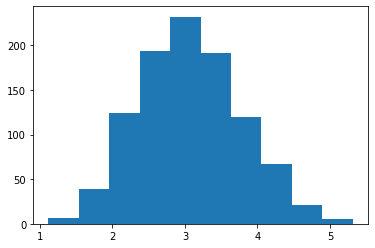

In [60]:
plt.hist(distance)

In [99]:
np.random.multivariate_normal(np.zeros(D), np.eye(D), size = n).shape

(10000, 20)

In [94]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [95]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])